In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv(r"./data/boston.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
class LinearRegression:
    """使用Python语言实现线性回归算法。（梯度下降）"""
    
    def __init__(self, alpha, times):
        """初始化方法。
        
        Parameters
        -----
        alpha : float
            学习率。用来控制步长。（权重调整的幅度）
            
        times : int
            循环迭代的次数。
        """
        self.alpha = alpha
        self.times = times
        
    def fit(self, X, y):
        """根据提供的训练数据，对模型进行训练。
        
        Parameters
        -----
        X : 类数组类型。形状：[样本数量， 特征数量]
            待训练的样本特征属性。（特征矩阵）
        
        y : 类数组类型。形状：[样本数量]
            目标值（标签信息）。
        """
        
        X = np.asarray(X)
        y = np.asarray(y)
        # 创建权重的向量，初始值为0（或任何其他的值），长度比特征数量多1。（多出的一个值就是截距。）
        self.w_ = np.zeros(1 + X.shape[1])
        # 创建损失列表，用来保存每次迭代后的损失值。损失值计算： (预测值 - 真实值) 的平方和 除以2
        self.loss_ = []
        
        # 进行循环，多次迭代。在每次迭代过程中，不断的去调整权重值，使得损失值不断减小。
        for i in range(self.times):
            # 计算预测值
            y_hat = np.dot(X, self.w_[1:]) + self.w_[0]
            # 计算真实值与预测值之间的差距。
            error = y - y_hat
            # 将损失值加入到损失列表当中。
            self.loss_.append(np.sum(error ** 2) / 2)
            # 根据差距调整权重w_，根据公式： 调整为  权重(j) =  权重(j) + 学习率 * sum((y - y_hat) * x(j))
            self.w_[0] += self.alpha * np.sum(error)
            self.w_[1:] += self.alpha * np.dot(X.T, error) 
            
    def predict(self, X):
        """根据参数传递的样本，对样本数据进行预测。
        
        Parameters
        -----
        X : 类数组类型，形状[样本数量， 特征数量]
            待测试的样本。
            
        Returns
        -----
        result : 数组类型。
            预测的结果。
        """
        X = np.asarray(X)
        result = np.dot(X, self.w_[1:]) + self.w_[0]
        return result

In [4]:
lr = LinearRegression(alpha=0.0005, times=20)
t = data.sample(len(data), random_state=0)
train_X = t.iloc[:400, :-1]
train_y = t.iloc[:400, -1]
test_X = t.iloc[400:, :-1]
test_y = t.iloc[400:, -1]

lr.fit(train_X, train_y)
result = lr.predict(test_X)
display(np.mean((result - test_y) ** 2))
display(lr.w_)
display(lr.loss_)

2.5268413180922583e+194

array([-4.91834304e+91, -2.22951224e+92, -4.88455022e+92, -5.86998643e+92,
       -3.32027589e+90, -2.77871751e+91, -3.06620005e+92, -3.47866130e+93,
       -1.79022122e+92, -5.41126556e+92, -2.15326961e+94, -9.17473442e+92,
       -1.74955789e+94, -6.49533349e+92])

[116831.44,
 352143585635913.9,
 1.3577847231161656e+24,
 5.238488102063899e+33,
 2.0210751390945202e+43,
 7.797564323191207e+52,
 3.0083992526731635e+62,
 1.1606786027493191e+72,
 4.478045318230486e+81,
 1.7276867019540434e+91,
 6.6656345078891096e+100,
 2.5716863678183203e+110,
 9.92189230686906e+119,
 3.827991942603092e+129,
 1.4768878616520924e+139,
 5.698020760231912e+148,
 2.1983687067286727e+158,
 8.481585403222014e+167,
 3.272303264323502e+177,
 1.2624961189018352e+187]

In [6]:
class StandardScaler:
    """该类对数据进行标准化处理。"""
    
    def fit(self, X):
        """根据传递的样本，计算每个特征列的均值与标准差。
        
        Parameters
        -----
        X : 类数组类型
            训练数据，用来计算均值与标准差。
        """
        X = np.asarray(X)
        self.std_ = np.std(X, axis=0)
        self.mean_ = np.mean(X, axis=0)
        
    def transform(self, X):
        """对给定的数据X，进行标准化处理。（将X的每一列都变成标准正态分布的数据）
        
        Parameters
        -----
        X : 类数组类型
            待转换的数据。
            
        Returns
        -----
        result : 类数组类型。
            参数X转换成标准正态分布后的结果。
        """
        
        return (X - self.mean_) / self.std_
    
    def fit_transform(self, X):
        """对数据进行训练，并转换，返回转换之后的结果。
        
        Parameters
        -----
        X : 类数组类型
            待转换的数据
            
        Returns
        -----
        result ： 类数组类型
            参数X转换成标准正态分布后的结果。
        
        """
        self.fit(X)
        return self.transform(X)
        

In [7]:
# 为了避免每个特征数量级的不同，从而在梯度下降的过程中带来影响，
# 我们现在考虑对每个特征进行标准化处理。
lr = LinearRegression(alpha=0.0005, times=20)
t = data.sample(len(data), random_state=0)
train_X = t.iloc[:400, :-1]
train_y = t.iloc[:400, -1]
test_X = t.iloc[400:, :-1]
test_y = t.iloc[400:, -1]

# 对数据进行标准化处理
s = StandardScaler()
train_X = s.fit_transform(train_X)
test_X = s.transform(test_X)

s2 = StandardScaler()
train_y = s2.fit_transform(train_y)
test_y = s2.transform(test_y)

lr.fit(train_X, train_y)
result = lr.predict(test_X)
display(np.mean((result - test_y) ** 2))
display(lr.w_)
display(lr.loss_)

0.20336064576087057

array([ 1.53932422e-16, -7.71128657e-02,  3.26567796e-02, -4.17268297e-02,
        7.24609817e-02, -1.22576315e-01,  3.18442051e-01, -9.42920843e-03,
       -2.09339731e-01,  1.03687319e-01, -5.22107348e-02, -1.82317645e-01,
        9.83898220e-02, -3.94766865e-01])

[200.0,
 107.16607914924599,
 88.91896294017965,
 79.79699900354936,
 74.33495874650424,
 70.91957416161512,
 68.7061649307762,
 67.21401040114299,
 66.1640222876996,
 65.39167226769372,
 64.79841173790199,
 64.32419686701928,
 63.931764580828826,
 63.597523544384345,
 63.30621040418721,
 63.04771396296815,
 62.815162490703536,
 62.603756023524795,
 62.4100435515406,
 62.23146925589152]

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] = False

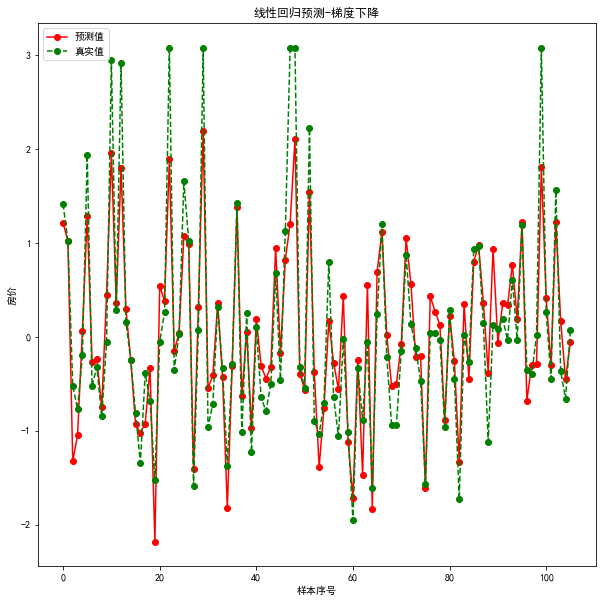

In [9]:
plt.figure(figsize=(10, 10))
# 绘制预测值
plt.plot(result, "ro-", label="预测值")
# 绘制真实值
plt.plot(test_y.values, "go--",label="真实值")
plt.title("线性回归预测-梯度下降")
plt.xlabel("样本序号")
plt.ylabel("房价")
plt.legend()
plt.show()

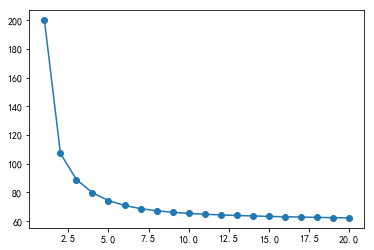

In [10]:
# 绘制累计误差值
plt.plot(range(1, lr.times + 1), lr.loss_, "o-")

In [11]:
# 因为房价分析涉及多个维度，不方便进行可视化显示，为了实现可视化，
# 我们只选取其中的一个维度（RM），并画出直线，实现拟合。
lr = LinearRegression(alpha=0.0005, times=50)
t = data.sample(len(data), random_state=0)
train_X = t.iloc[:400, 5:6]
train_y = t.iloc[:400, -1]
test_X = t.iloc[400:, 5:6]
test_y = t.iloc[400:, -1]

# 对数据进行标准化处理
s = StandardScaler()
train_X = s.fit_transform(train_X)
test_X = s.transform(test_X)
s2 = StandardScaler()
train_y = s2.fit_transform(train_y)
test_y = s2.transform(test_y)

lr.fit(train_X, train_y)
result = lr.predict(test_X)
display(np.mean((result - test_y) ** 2))

0.46071758937162155

array([-3.03757020e-16,  6.54984608e-01])

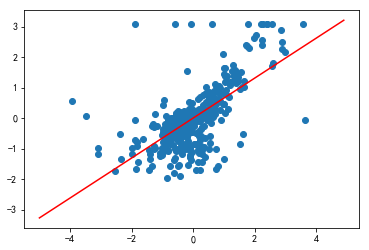

In [12]:
plt.scatter(train_X["RM"], train_y)
# 查看方程系数
display(lr.w_)
# 构建方程 y = -3.03757020e-16 + 6.54984608e-01 * x
x = np.arange(-5, 5, 0.1)
y = -3.03757020e-16 + 6.54984608e-01 * x
# plt.plot(x, y, "r")
# 也可以这样做
plt.plot(x, lr.predict(x.reshape(-1, 1)), "r")